In [ ]:
!wget {"https://d2pn8kiwq2w21t.cloudfront.net/original_images/jpegPIA10748.jpg"}

--2024-05-23 13:59:57--  https://d2pn8kiwq2w21t.cloudfront.net/original_images/jpegPIA10748.jpg
Resolving d2pn8kiwq2w21t.cloudfront.net (d2pn8kiwq2w21t.cloudfront.net)... 13.32.176.193, 13.32.176.8, 13.32.176.203, ...
Connecting to d2pn8kiwq2w21t.cloudfront.net (d2pn8kiwq2w21t.cloudfront.net)|13.32.176.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2049707 (2.0M) [image/jpeg]
Saving to: ‘jpegPIA10748.jpg’

jpegPIA10748.jpg    100%[===================>]   1.95M  --.-KB/s    in 0.08s   

2024-05-23 13:59:58 (25.6 MB/s) - ‘jpegPIA10748.jpg’ saved [2049707/2049707]



In [ ]:
#os.mkdir("milkywaxy_challange",'r')
#os.chdir("milkywaxy_challange")
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
image = Image.open("../jpegPIA10748.jpg")

In [ ]:
ls

In [ ]:
image = np.array(image)
print(type(image))
print(np.shape(image))

<class 'numpy.ndarray'>
(5600, 5600, 3)


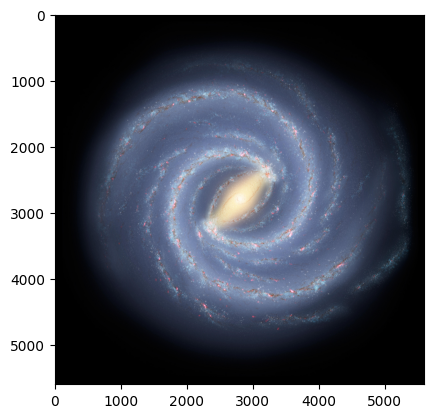

In [ ]:
plt.imshow(image)

In [164]:
import torch
from torchvision import transforms
from torchvision.transforms import v2

image_tensor = torch.from_numpy(image).permute(2, 0, 1)
rotater = v2.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(image_tensor) for _ in range(4)]
#rotated_image_tensor = rotation_transform(image_tensor)



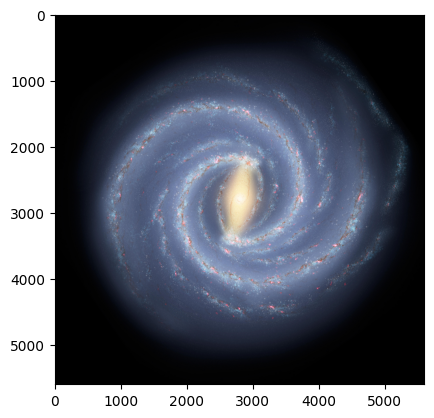

In [166]:
plt.imshow(rotated_imgs[1].permute(1, 2, 0))

In [ ]:
# crop the image a bit to get 64x64 shape
def crop_center(image, cropx, cropy):
    y, x, _ = image.shape
    startx = x // 2 -(cropx // 2)
    starty = y // 2 -(cropy // 2)
    return image[ starty:starty+cropy, startx:startx+cropx, :]

image_cropped = crop_center(image=image, cropx=2400, cropy=2400)

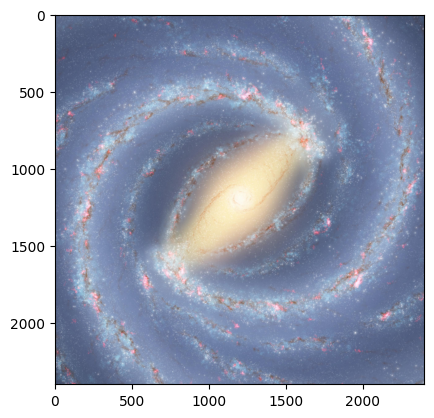

In [ ]:
plt.imshow(image_cropped)

(64, 64, 3)


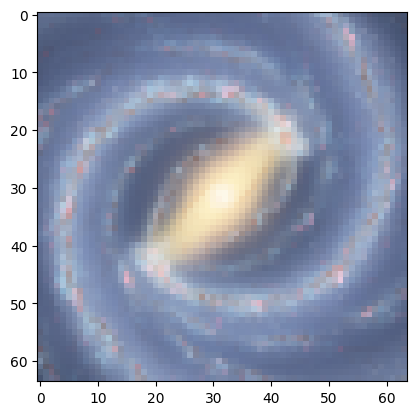

In [ ]:
import imutils
image_resized = imutils.resize(image_cropped,width=64)
plt.imshow(image_resized)
print(image_resized.shape)

In [ ]:
#save_path = "milkyway_images/"
np.save("im1", image_resized)

In [ ]:
print()

In [ ]:
import cv2
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result
#noise
def transform_noise(image, noise_factor):
  noise = np.random.rand(np.shape(image)[0], np.shape(image)[1], 3)
  print(np.max(image))
  img = image + noise * noise_factor *0.01
  img[img < 0] = 0
  img[img > 255] = 255
  print(np.min(img))
  print(np.max(img))
  return img


#def create_more_images(image, squish_factor, )
img = rotate_image(image, 40)
img = transform_noise(img, 1)
#img =cv2.resize(image, (160,60))

255


TypeError: only length-1 arrays can be converted to Python scalars

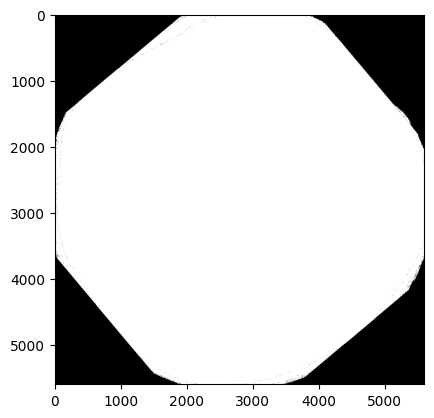

In [ ]:
plt.imshow(img)

In [ ]:
ls ../../

bin@                        datalab/  kaggle/  libx32@                   opt/   sbin@  tools/
boot/                       dev/      lib@     media/                    proc/  srv/   usr/
content/                    etc/      lib32@   mnt/                      root/  sys/   var/
cuda-keyring_1.0-1_all.deb  home/     lib64@   NGC-DL-CONTAINER-LICENSE  run/   tmp/


In [ ]:
#dummy help from pavish to do image augmentation do not run

import h5py
import numpy as np

# Get galaxies, ref.: https://astronn.readthedocs.io/en/latest/galaxy10sdss.html
with h5py.File('Galaxy10.h5', 'r') as F:
  labels = np.array(F['ans'])
  images = np.array(F["images"])

# turn color into grayscale
images = images.mean(axis=-1, keepdims=True)
# crop the images 64x64 pixels
images = images[:, 2:66, 2:66, :]
# normalize intensity from 0...255 to 0...1.0
images = images.astype(np.float32) / 255.

# balance dataset ON OFF
def balance_dataset(images_in, labels_in):
  def manipulators(img, i):
    img = np.copy(img)
    if i%6 == 0:
      return np.rot90(img, 1, axes=(0,1))
    if i%6 == 1:
      return np.flip(img, 0)
    if i%6 == 2:
      return np.rot90(img, 2, axes=(0,1))
    if i%6 == 3:
      return np.flip(img, 1)
    if i%6 == 4:
      return np.rot90(img, 3, axes=(0,1))
    if i%6 == 5:
      return img

  relative_probability = np.empty(10)
  for i in range(10):
    relative_probability[i] = np.count_nonzero(labels_in == i)
  relative_probability /= relative_probability.max()
  factors = 1. / relative_probability
  factors = np.around(factors).astype(int)
  images_out = list(images_in)
  labels_out = list(labels_in)
  for i in range(len(labels_in)):
    images_out.append(manipulators(images_in[i], 0))
    labels_out.append(labels_in[i])
    images_out.append(manipulators(images_in[i], 1))
    labels_out.append(labels_in[i])
    images_out.append(manipulators(images_in[i], 2))
    labels_out.append(labels_in[i])
    images_out.append(manipulators(images_in[i], 3))
    labels_out.append(labels_in[i])
    images_out.append(manipulators(images_in[i], 4))
    labels_out.append(labels_in[i])
    for j in range(factors[labels_in[i]] - 1):
      images_out.append(manipulators(images_in[i], j))
      #images_out.append(images_in[i])
      labels_out.append(labels_in[i])
  #print(relative_probability)
  #print(factors)
  images_out = np.array(images_out)
  labels_out = np.array(labels_out)
  shuffle_idx = np.random.default_rng(seed=246).permutation(len(images_out))
  images_out = images_out[shuffle_idx, ...]
  labels_out = labels_out[shuffle_idx, ...]
  return images_out, labels_out

# shuffle once
shuffle_idx = np.random.default_rng(seed=246).permutation(len(images))
images = images[shuffle_idx, ...]
labels = labels[shuffle_idx, ...]

# show shape
print(f"{images.shape=} {labels.shape=}")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'Galaxy10.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Neuer Abschnitt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')